# Homework 6: Problems

### ASTROINFORMATICS
https://github.com/astromundus/astroinfo2018/blob/master/homework/HW6.ipynb


## Problem 1: Principal Component Analysis

PCA applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

-- SDSS u-g and g-i colors, 

-- LINEAR variability period (logP) and variability amplitude (A).

Read the data (see below), run PCA (with four components), and then

a) to get familar with the dataset, plot g-i vs. u-g and A vs. logP diagrams

b) plot P2 vs. P1 diagram, and P3 vs. P1 diagram, and P3 vs. P4 diagram. 
Comment what insights, if any, did PCA analysis bring. 

c) plot P1 vs. g-i and P1 vs. logP diagrams; repeat with P2, P3, and P4.
Comment what insights, if any, did PCA analysis bring. 


## Problem 2: Regression and age-color relation for asteroids

We will use age and color data for asteroid families shown in figure 1 from the paper "An age–colour relationship for main-belt S-complex asteroids" by Jedicke et al. (2004, Nature 429, 275), see http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf

Given these y(x) data (see below), with errors in both x and y, 
adapt the code introduced in 
[the last lecture](https://github.com/uw-astr-324-s17/astr-324-s17/blob/master/notebooks/Week-8-Thu.ipynb) 
by modifying the parabola (y(x) = a + b*x + c*x^2) fitter to fit instead
the following function

$$ y(x) = a + b*\left[1-exp\left(-(x/c)^d\right)\right].  $$

Important: here x is time, not log(time)! But when you plot, use log(time)
for x axis (see data below).

a) What are the the best-fit values and standard errors for 
parameters a, b, c and d? 

b) Show the marginal distributions of fitted parameters (hint: use plot_mcmc)

c) compare your best fit to the best fit from Jedicke et al. and comment

d) set all age errors to 1000 years (i.e. to 0.001 in Myr): 
do you get a different best fit? 

<br>
# Homework 1: Solutions

### Some useful definitions and functions

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_LINEAR_geneva
from sklearn.decomposition import PCA
import pandas as pd
from scipy import optimize
from matplotlib.patches import Ellipse
import pymc as pymc
import seaborn as sns
from astroML.linear_model import TLS_logL
from astroML.plotting.mcmc import plot_mcmc
from astroML.plotting.mcmc import convert_to_stdev
from astroML.datasets import fetch_hogg2010test
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [49]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

## Problem 1
PCA applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

-- SDSS u-g and g-i colors,

-- LINEAR variability period (logP) and variability amplitude (A).

Read the data (see below), run PCA (with four components), and then

a) to get familar with the dataset, plot g-i vs. u-g and A vs. logP diagrams

b) plot P2 vs. P1 diagram, and P3 vs. P1 diagram, and P3 vs. P4 diagram. Comment what insights, if any, did PCA analysis bring.

c) plot P1 vs. g-i and P1 vs. logP diagrams; repeat with P2, P3, and P4. Comment what insights, if any, did PCA analysis bring.

First obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [50]:
data = fetch_LINEAR_geneva()
# N.B. this is a 7-dimensional dataset
A = data['amp']
ug = data['ug']
gi = data['gi']
logP = data['logP']

ug=ug[A>0]
gi=gi[A>0]
logP=logP[A>0]
A=A[A>0]

### a) G-I vs U-G and A vs logP

Text(0.5, 1.0, 'Amplitude vs Age Plot')

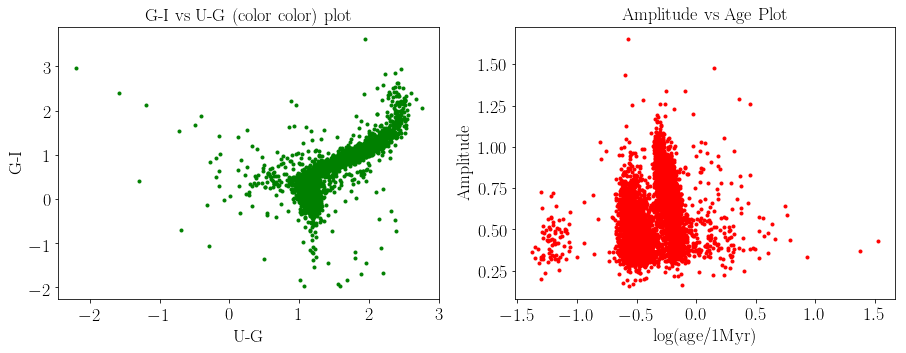

In [51]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121)
ax1.plot(ug,gi,'.g')
ax1.set_ylabel('G-I')
ax1.set_xlabel('U-G')
ax1.set_title('G-I vs U-G (color color) plot')

ax2 = fig.add_subplot(122)
ax2.plot(logP,A,'.r')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('log(age/1Myr)')
ax2.set_title('Amplitude vs Age Plot')


### b) P1, P2, P3, P4 plots

In [111]:
x=np.transpose(np.array([ug,gi,logP,A]))
# x = StandardScaler().fit_transform(x)
pca=PCA(n_components=4,whiten=True)
pca.fit(x)
y = pca.transform(x)

print(y)

P1=y[:,0]
P2=y[:,1]
P3=y[:,2]
P4=y[:,3]
mean=pca.mean_
components=pca.components_
var=pca.explained_variance_ratio_
var

[[-0.22770891  0.61639861 -0.23293063  0.12797763]
 [ 0.17423154  0.43324153 -0.78055788 -0.19272509]
 [-0.52368542 -0.56865653  0.78142295 -0.98103367]
 ..., 
 [ 0.98366703  0.36927961 -0.7967057   1.44205343]
 [ 0.8203419   0.62252741  0.21126974 -1.41726872]
 [ 0.04093776  1.03497612 -0.06187935 -1.94673902]]


array([ 0.70885283,  0.11773594,  0.10577746,  0.06763377])

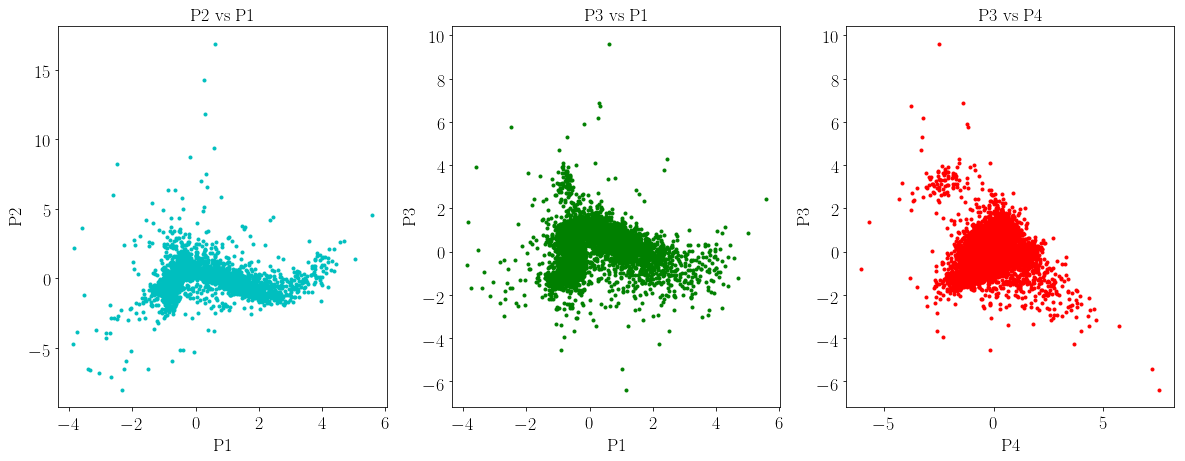

In [112]:
fig = plt.figure(figsize=(20, 7))

ax1 = fig.add_subplot(131)
ax1.plot(P1,P2,'.c')
ax1.set_title('P2 vs P1')
ax1.set_ylabel('P2')
ax1.set_xlabel('P1')

ax2 = fig.add_subplot(132)
ax2.set_title('P3 vs P1')
ax2.plot(P1,P3,'.g')
ax2.set_ylabel('P3')
ax2.set_xlabel('P1')

ax3 = fig.add_subplot(133)
ax3.plot(P4,P3,'.r')
ax3.set_title('P3 vs P4')
ax3.set_ylabel('P3')
ax3.set_xlabel('P4')

plt.show()

#### __ANSWER:__ `Clustering is observed in all of them. Maximum variance along P1 in the first two plots . `

### P's vs G-I and P's vs Age

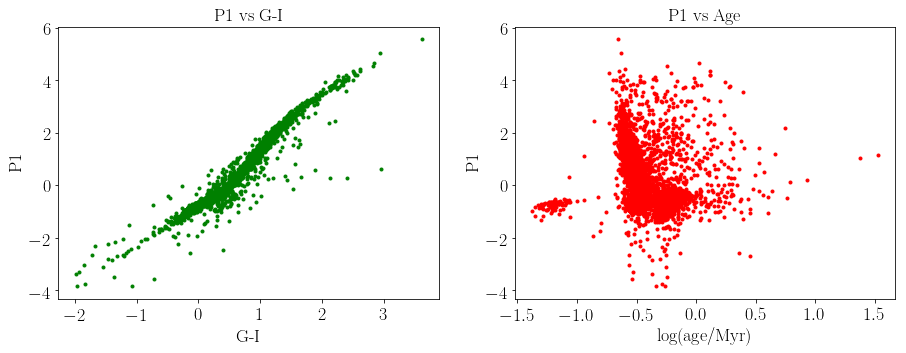

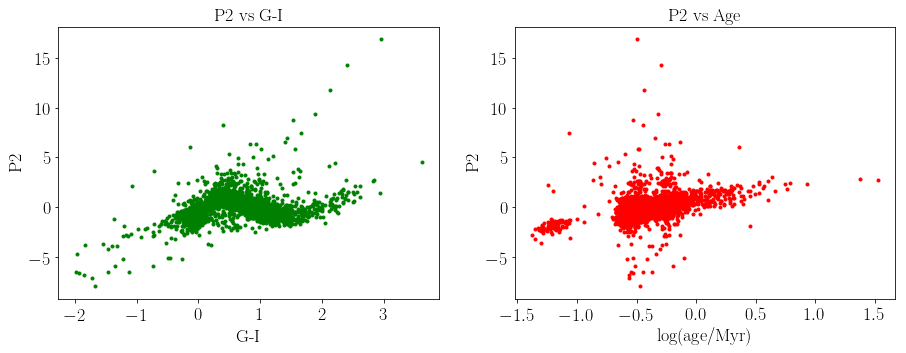

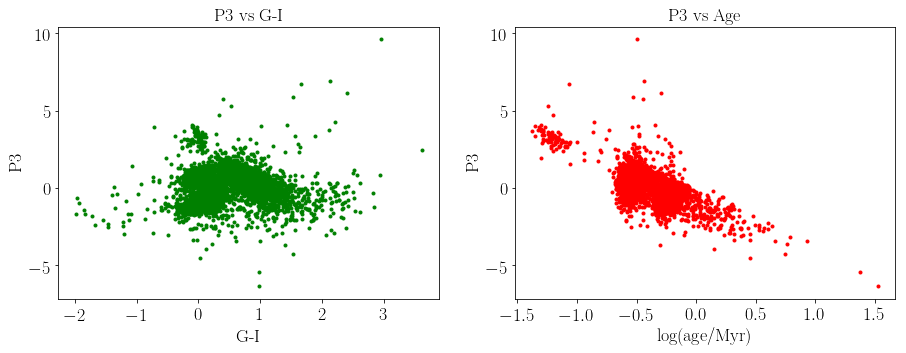

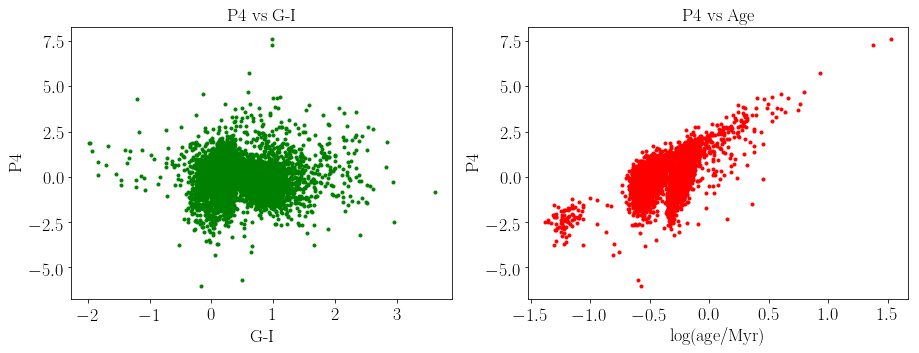

In [115]:
for P,i in zip([P1,P2,P3,P4],range(1,5)):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(121)
    ax1.plot(gi,P,'.g')
    ax1.set_title('P%d vs G-I'%i)
    ax1.set_ylabel('P%d'%i)
    ax1.set_xlabel('G-I')
#     ax1.set_ylim(-3,4)
    
    ax2 = fig.add_subplot(122)
    ax2.plot(logP,P,'.r')
    ax2.set_title('P%d vs Age'%i)
    ax2.set_ylabel('P%d'%i)
    ax2.set_xlabel('log(age/Myr)')
#     ax1.set_ylim(-5,5)

#### __ANSWER:__`The color G-I correlates the most positively with P1. Age positively correlates with P2 and P4, while negatively with P3.`

## Problem 2


We will use age and color data for asteroid families shown in figure 1 from the paper "An age–colour relationship for main-belt S-complex asteroids" by Jedicke et al. (2004, Nature 429, 275), see http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf

Given these y(x) data (see below), with errors in both x and y, 
adapt the code introduced in 
[the last lecture](https://github.com/uw-astr-324-s17/astr-324-s17/blob/master/notebooks/Week-8-Thu.ipynb) 
by modifying the parabola (y(x) = a + b*x + c*x^2) fitter to fit instead
the following function

$$ y(x) = a + b*\left[1-exp\left(-(x/c)^d\right)\right].  $$

Important: here x is time, not log(time)! But when you plot, use log(time)
for x axis (see data below).

a) What are the the best-fit values and standard errors for 
parameters a, b, c and d? 

b) Show the marginal distributions of fitted parameters (hint: use plot_mcmc)

c) compare your best fit to the best fit from Jedicke et al. and comment

d) set all age errors to 1000 years (i.e. to 0.001 in Myr): 
do you get a different best fit? 

These age and color data for asteroid families are taken
from the paper Jedicke et al. (2004, Nature 429, 275), see fig. 1 in http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf



In [116]:
# Age is measured in 10^6 yrs (Myr)
# Log10(age) and error (of Log(Age))
logAge = np.asarray([3.398, 2.477, 3.398, 3.477, 3.301, 1.699, 2.699, 0.763,
         2.301, 3.079,  3.176, 0.398])
LageErr = np.asarray([0.087, 0.145, 0.174, 0.145, 0.109, 0.347, 0.174, 0.015,
          0.217, 0.145, 0.145, 0.434])
# SDSS principal asteroid color PC1 and its error (per family)
PC1 = np.asarray([0.620, 0.476, 0.523, 0.582, 0.460, 0.479, 0.432, 0.351, 
       0.427, 0.522, 0.532, 0.311])
PC1err = np.asarray([0.005, 0.015, 0.007, 0.011, 0.005, 0.032, 0.033, 0.047,
        0.021, 0.015, 0.022, 0.027])
# time/age on linear axes
age = 10**logAge
# and standard error propagation (although errors can be large)
ageErr = age * LageErr * np.log(10)

In [121]:
### now let's redo the above code to be able to do a parabola
### y = a + b*x + c*x^2 
### (an analogous modification will be needed for Homework #8)
def doMCMCexpo(xObs, yObs, xErr, yErr, doXerror = False, nChain = 10000, nBurn = 2000): 
    def model(xObs, yObs, xErr, yErr, doXerror): 
        a = pymc.Uniform('a', -1e3, 1e3, value= 1.0)
        b = pymc.Uniform('b', -1e3, 1e3, value= 0.0)
        c = pymc.Uniform('c', -1e5, 1e5, value= 1.0)
        d = pymc.Uniform('d', -1e3, 1e3, value= 0.0)
        if (doXerror):
            xLatent = pymc.Normal('x', mu=xObs, tau=(xErr)**-2)  
        else:
            xLatent = xObs 
        
        @pymc.deterministic()
        def expo(x=xLatent, a=a, b=b, c=c, d=d):
            return a+b*(1-np.exp(-(x/c)**d))
    
        y = pymc.Normal('y', mu=expo, tau=(yErr)**-2, value=yObs, observed=True)
        return locals()

    myModel = pymc.MCMC(model(xObs,yObs, xErr, yErr, doXerror))
    myModel.sample(nChain, nBurn, 1)
    traces = [myModel.trace(s)[:] for s in ['a', 'b', 'c', 'd']]
    M = pymc.MAP(myModel)
    M.fit()
    fit_vals = (M.a.value, M.b.value, M.c.value, M.d.value)
    return traces, fit_vals

In [155]:
traces, fit_vals = doMCMCexpo(age, PC1, ageErr, PC1err, True, 200000, 20000)

/home/varun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


 [-----------------100%-----------------] 200000 of 200000 complete in 54.7 sec

In [156]:
print("BASIC STATS:")
for par, i in zip(['a','b','c','d'],range(4)):
    print('%s = %.3g ± %.3g'%(par,fit_vals[i], np.std(traces[i])))

BASIC STATS:
a = 0.371 ± 0.0419
b = 2 ± 0.629
c = 6.95e+04 ± 2.76e+04
d = 0.612 ± 0.181


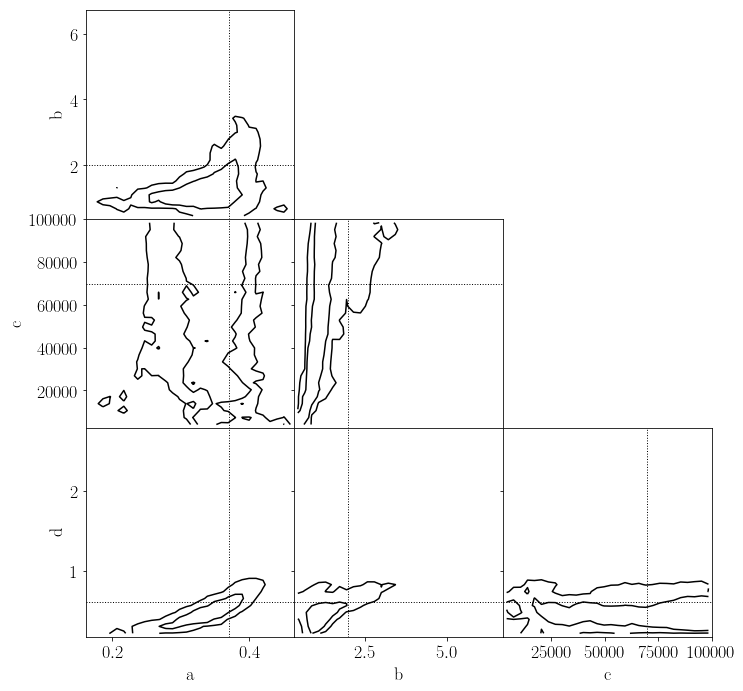

In [157]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.1, right=0.95,
                    hspace=0.05, wspace=0.05)
labels = ['a','b','c','d']
trued=[0.32, 1.0,2.5e4,0.5]
# for i in range(4):
limits = [(traces[0].min(),traces[0].max()),(traces[1].min(),traces[1].max()),(traces[2].min(),traces[2].max()),(traces[3].min(),traces[3].max())]
plot_mcmc(traces, labels=labels, fig=fig, true_values=fit_vals, bins=30, colors='k',limits=limits)
plt.show()

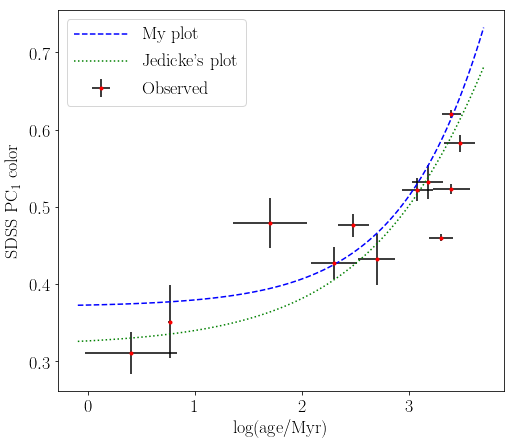

In [158]:
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
color= fit_vals[0]+fit_vals[1]*(1-np.exp(-(time/fit_vals[2])**fit_vals[3]))
color_jedi = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
fig=plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, '--b',label='My plot')
ax.plot(logT,color_jedi, ':g',label='Jedicke\'s plot')
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err,ecolor='k',color='r', 
             marker='.', ls='None', label='Observed')
plt.legend()
plt.show() 

### d) $\Delta$age=0.001Myr

In [159]:
traces2, fit_vals2 = doMCMCexpo(age, PC1, 0*ageErr + 0.001, PC1err, True, 200000, 20000)

/home/varun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in power


 [                  1%                  ] 2031 of 200000 complete in 0.5 sec

/home/varun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in power


 [-----------------100%-----------------] 200000 of 200000 complete in 62.9 sec

In [160]:
print("BASIC STATS:")
for par, i in zip(['a','b','c','d'],range(4)):
    print('%s = %.3g ± %.3g'%(par,fit_vals2[i], np.std(traces2[i])))

BASIC STATS:
a = 0.587 ± 0.0709
b = -0.124 ± 0.0597
c = 2.39e+03 ± 874
d = -993 ± 471


<Figure size 720x720 with 0 Axes>

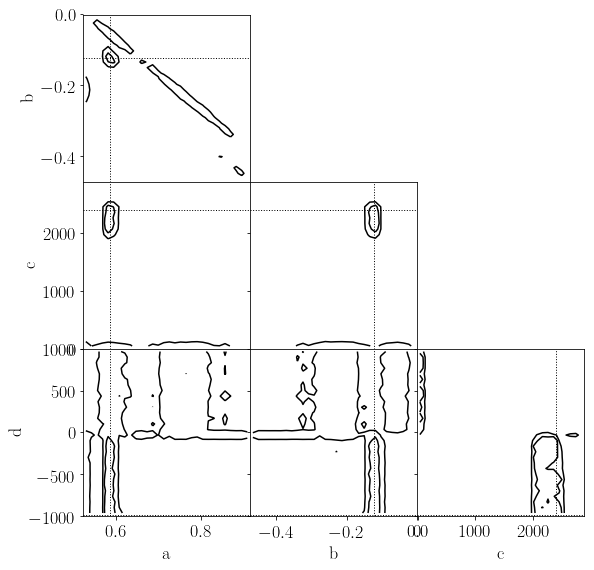

In [161]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.1, right=0.95,
                    hspace=0.05, wspace=0.05)
labels = ['a','b','c','d']
# limits = [(1.0,4.0),(-4.0,0.0),(-200,200),(-0.5,0.5)]
plot_mcmc(traces2, labels=labels, true_values=fit_vals2, bins=30, colors='k')
plt.show()

/home/varun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


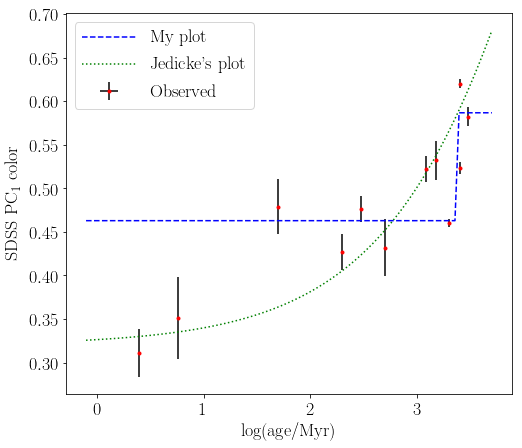

In [162]:
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
color= fit_vals2[0]+fit_vals2[1]*(1-np.exp(-(time/fit_vals2[2])**fit_vals2[3]))
color_jedi = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
fig=plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, '--b',label='My plot')
ax.plot(logT,color_jedi, ':g',label='Jedicke\'s plot')
ax.errorbar(logAge,PC1,xerr=0.001/age/np.log(10), yerr=PC1err,ecolor='k',color='r', 
             marker='.', ls='None', label='Observed')
plt.legend()
plt.show() 

### __ANSWER__: `Blasphemy of a fit! 0.001Myr error in age is proposterous. Bad fit!`